# Exploring the HITRAN Database

In [1]:
import os
# Uncomment and adjust the following lines
# if ARTS_DATA_PATH is not set as environment variable
os.environ["ARTS_DATA_PATH"] = "/Users/wgblumbe/Code/rttools/arts_catalogs/arts-cat-data-snapshot-arts-2.5.8/"
import pyarts
import matplotlib.pyplot as plt
import numpy as np
from line_module import getLines, tag2tex
import pint

ureg = pint.get_application_registry()

## Viewing HITRAN Spectral Line for a specific molecular isotope

The variable `species` is a string that corresponds to a particular molecular isotope within the line database.

We have to tell the radiative transfer model (that reads in each of the spectral lines from the line database) what spectral regions we want.

`fmin` - the minimum frequency/wavelength/wavenumber

`fmax` - the maximum frequency/wavelength/wavenumber

`fnum` - the number of frequencies in between `fmin` and `fmax`

This next block of code loops through the spectral line database for the selected molecule and pulls out the line locations and the line strength.

**Some possible isotopes to explore:**

* O2-66
* O3-666
* N2O-646
* CO2-626, CO2-627
* H2O-161
* CH4-211

In [64]:
species = "O2-66"
fmin = 10 * ureg.Unit("GHz")
fmax = 200 * ureg.Unit("GHz")

#species = "CO2"
#fmin = 4 * ureg.Unit("micrometer")
#fmax = 16 * ureg.Unit("micrometer")

species = "CO2-626"
species = "CO-26"
species = "O3-666"
species = "H2O-161"

fmin = 300 * ureg.Unit("centimeter**-1")
fmax = 4000 * ureg.Unit("centimeter**-1")
fnum= 100000

line_location, line_strength = getLines(species, fmin, fmax, fnum)

if str(line_location[0].dimensionality) == "[length]":
    xlabel = f"Wavelength [${line_location[0].units}$]"
elif str(line_location[0].dimensionality) == "1 / [time]":
    xlabel = f"Frequency [${line_location[0].units}$]"
elif str(line_location[0].dimensionality) == "1 / [length]":
    xlabel = f"Wavenumber [${line_location[0].units}$]"

print("Spectral units:", xlabel)


Lines meta-data:
	Species identity:
		Species: H2O-161
		Identity: H2O-161 ElecStateLabel X X v1 17 0 v2 0 0 v3 0 0
	The lines will be cut-off 0.01 Hz from the line center + D0.
	The lines are considered as in pure LTE.
	Simple frequency scaling of the far-wings will be applied, i.e. F ~ (f / f0) * ((1 - exp(- hf / kT)) / (1 - exp(- hf0 / kT)))
	The line shape type is the Voigt profile.
	These lines are not mirrored at 0 Hz.
	The reference temperature for all line parameters is 296 K.
	If applicable, there is no line mixing limit.
	No line data is available.

Spectral units: Wavenumber [$1 / centimeter$]


## Plotting the lines from HITRAN

Now let's plot the line locations for this spectral region.

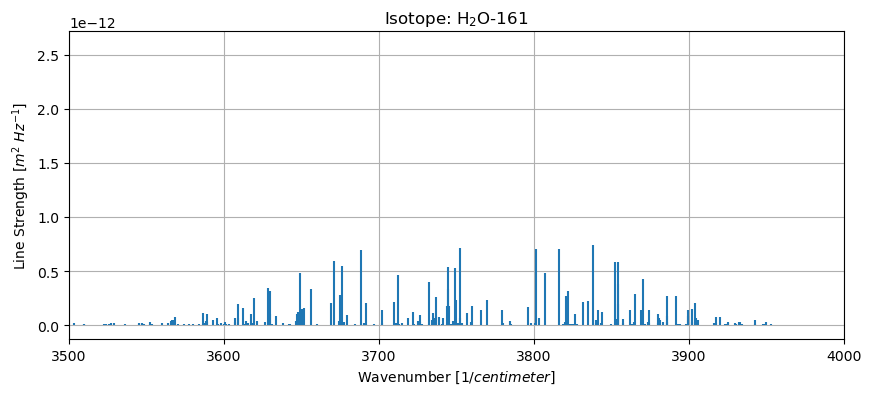

In [68]:
#wnum_min = 2280
#wnum_max = 2400

#wnum_min = 970
#wnum_max = 1075

wnum_min = 3500
wnum_max = 4000

freq = line_location.to("GHz", "spectroscopy")

plt.figure(figsize=(10,4))
plt.vlines(line_location, ymin=0, ymax=line_strength)

plt.xlim(wnum_min, wnum_max) # Alter the limits of the x-axis.

plt.ylabel("Line Strength [$m^2\ Hz^{-1}$]")
plt.xlabel(xlabel)
plt.title(f"Isotope: {tag2tex(species)}")
plt.grid()
#plt.savefig(f'plots/{species}_lines_{wnum_min}_{wnum_max}.png')
plt.show()


In [53]:
freq, line_strength

(array([ 12.00881647,  26.83427302,  67.80370047,  96.26116978,
        119.99591855, 129.81154334, 129.88951936, 209.11837036,
        232.68670435, 262.89774968, 263.45134643, 293.66446032,
        297.43914716,  22.23506698, 139.61430703, 177.31707594,
        247.44015075, 259.95219884, 266.5618131 , 289.01195119,
        294.8235479 , 120.54363937, 137.04853327, 147.52151298,
        268.14912422, 183.31010705, 196.97395777, 254.03987186]) <Unit('gigahertz')>,
 array([7.59914184e-22, 1.14287727e-21, 3.72742717e-20, 4.56910427e-21,
        4.27151129e-20, 1.82854350e-23, 6.10215899e-24, 4.98693683e-21,
        1.85409442e-20, 2.11291013e-22, 6.36668608e-22, 5.39274543e-21,
        1.84447525e-21, 1.33796599e-18, 3.53804982e-22, 3.62822951e-23,
        8.14923794e-22, 1.80088840e-21, 5.21238605e-27, 4.78854151e-28,
        5.91879362e-29, 1.07915028e-23, 1.45670258e-23, 5.54605090e-24,
        1.01031312e-23, 2.34016294e-16, 5.11318840e-24, 1.57634097e-23]) <Unit('meter ** 2 / hertz

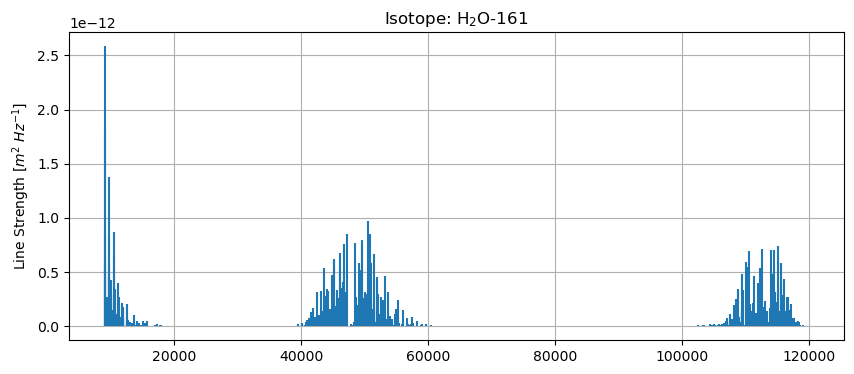

In [69]:

freq = line_location.to("GHz", "spectroscopy")

plt.figure(figsize=(10,4))
plt.vlines(freq, ymin=0, ymax=line_strength)

#plt.xlim(wnum_min, wnum_max) # Alter the limits of the x-axis.

plt.ylabel("Line Strength [$m^2\ Hz^{-1}$]")
#plt.xlabel(xlabel)
plt.title(f"Isotope: {tag2tex(species)}")
#plt.yscale('log')
plt.grid()
#plt.savefig(f'plots/{species}_lines_{wnum_min}_{wnum_max}.png')
plt.show()